In [1]:
from adapt_utils import replace_symbols
from my_utils import print_proof_props_graph, get_proof_steps, print_ident_proof, print_proof_linear_steps
from my_utils import get_proof_steps_graph, print_proof_steps_graph

from networkx.drawing.nx_pydot import graphviz_layout

from tree_parser import *

import networkx as nx

import matplotlib
import matplotlib.pyplot as plt

import copy

import time

from collections import Counter

In [2]:
%%time

text = file_contents()
database = meta_math_database(text,n=3500)
print("")

included 5555695 tokens from set.mm
proposition: 3500
CPU times: user 9.76 s, sys: 281 ms, total: 10 s
Wall time: 10.1 s


In [3]:
prop = database.propositions['dfss2']

In [4]:
[p.label for p in database.propositions_list[-10:]]

['eqss',
 'eqssi',
 'eqssd',
 'eqrd',
 'ssid',
 'ssv',
 'sseq1',
 'sseq2',
 'sseq12',
 'sseq1i']

In [5]:
p_label = "xpundi"
p_label = "dfss2"

prop = database.propositions[p_label]

occur_counter = Counter()

max_depth = 15
for step1 in prop.entails_proof_steps:
    for step2 in step1.prop.entails_proof_steps:
        _ = get_proof_steps(step2.prop, max_depth=max_depth, cntr=occur_counter)

#_ = get_proof_steps(prop, max_depth=1, cntr=occur_counter)

[(p.prop.label, occur_counter[p.prop.label]) for p in prop.entails_proof_steps]

[('dfss', 0),
 ('df-in', 0),
 ('eqeq2i', 0),
 ('abeq2', 0),
 ('3bitri', 8),
 ('pm4.71', 0),
 ('albii', 131),
 ('bitr4i', 40)]

In [6]:
print_proof_linear_steps(p_label, database)

[dfss] |- ( A ⊆ B ↔ A = ( A ∩ B ) )
[df-in] |- ( A ∩ B ) = { x | ( x ∈ A ∧ x ∈ B ) }
[eqeq2i] |- ( A = ( A ∩ B ) ↔ A = { x | ( x ∈ A ∧ x ∈ B ) } )
[abeq2] |- ( A = { x | ( x ∈ A ∧ x ∈ B ) } ↔ ∀ x ( x ∈ A ↔ ( x ∈ A ∧ x ∈ B ) ) )
[3bitri] |- ( A ⊆ B ↔ ∀ x ( x ∈ A ↔ ( x ∈ A ∧ x ∈ B ) ) )
[pm4.71] |- ( ( x ∈ A → x ∈ B ) ↔ ( x ∈ A ↔ ( x ∈ A ∧ x ∈ B ) ) )
[albii] |- ( ∀ x ( x ∈ A → x ∈ B ) ↔ ∀ x ( x ∈ A ↔ ( x ∈ A ∧ x ∈ B ) ) )
[bitr4i] |- ( A ⊆ B ↔ ∀ x ( x ∈ A → x ∈ B ) )


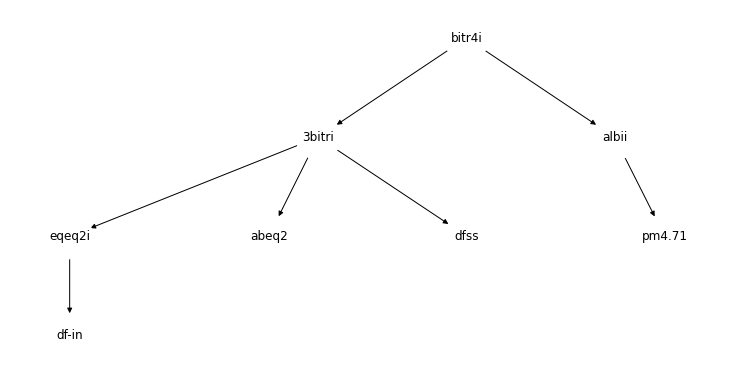

In [7]:
print_proof_props_graph(p_label, database)

In [8]:
conda install pydot

Solving environment: done
^C

CondaError: KeyboardInterrupt


Note: you may need to restart the kernel to use updated packages.


In [9]:
G, root = get_proof_steps_graph("dfss2", database)

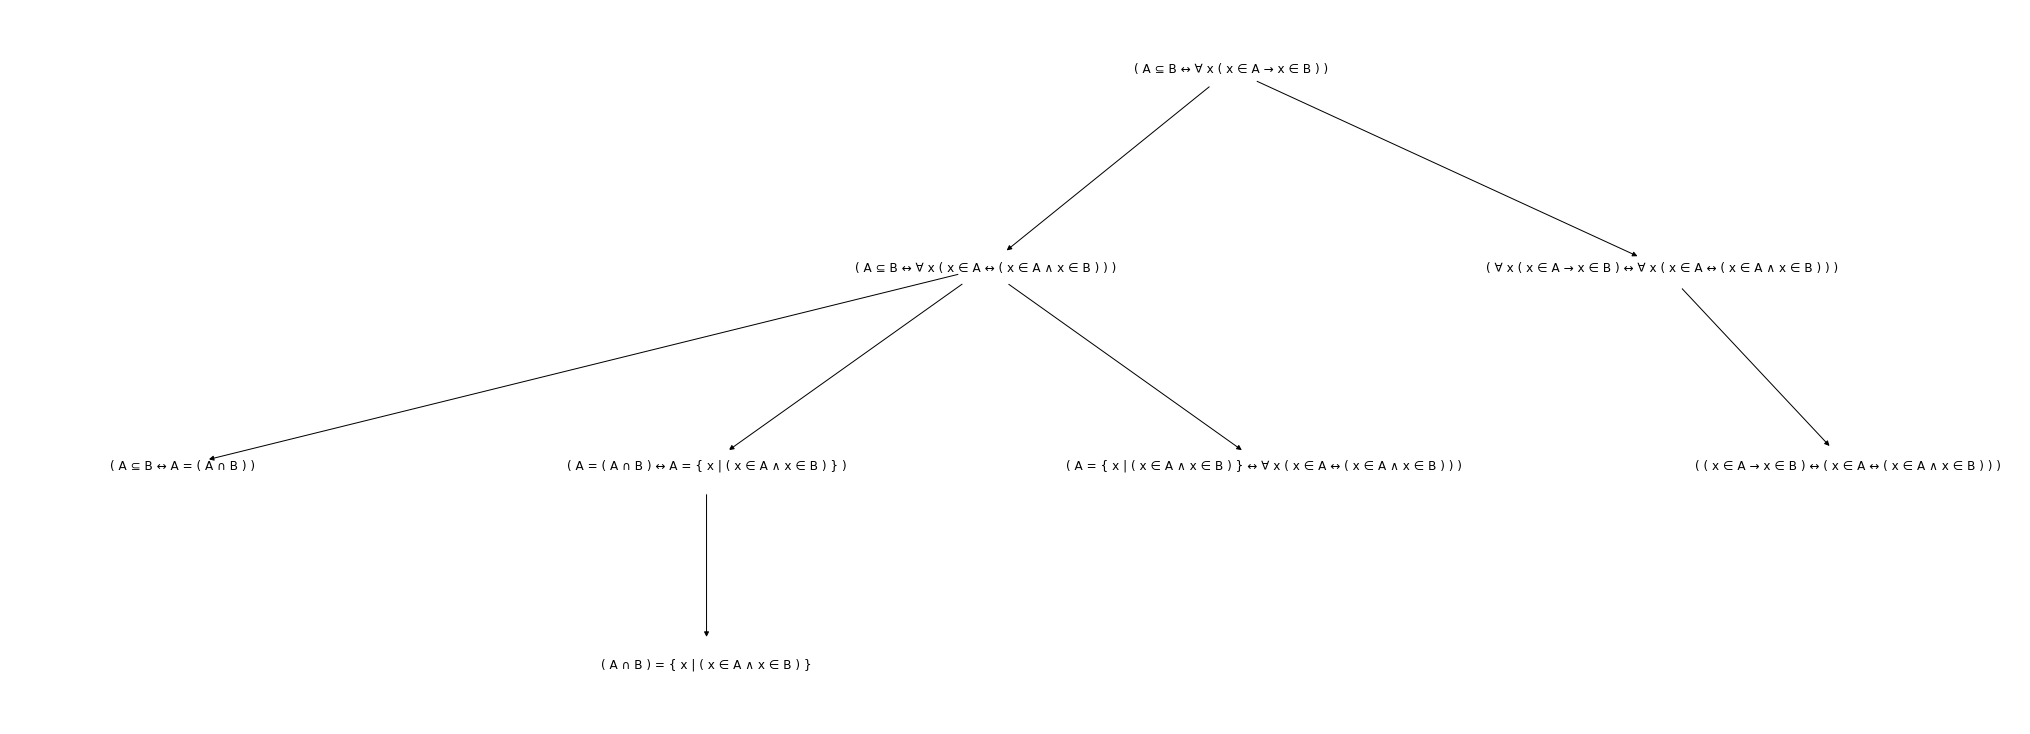

In [10]:
print_proof_steps_graph(G, root, figsize=(28,10))

In [39]:
def remove_parentheses(text):
    if text.startswith("( ") and text.endswith(" )"):
        return text[2:-2]
    
    return text

In [62]:
graph_leaves = [n for n in G.nodes() if len(G.out_edges(n)) == 0]


proof_text = []

for node, edges in nx.bfs_successors(G, root):
    step_text = "{} Como {}, logo {}.".format(
        tab_label(node.label),
        " e ".join([remove_parentheses(e.statement) for e in edges]), 
        remove_parentheses(node.statement)
    )   
    
    proof_text.append(step_text)
    
for node in graph_leaves:
    step_text = "{} Seja {}.".format(
        tab_label(node.label),
        remove_parentheses(node.statement)
    )
    proof_text.append(step_text)
    
for step_text in reversed(proof_text):
    print(step_text)

[df-in]    Seja ( A ∩ B ) = { x | ( x ∈ A ∧ x ∈ B ) }.
[abeq2]    Seja A = { x | ( x ∈ A ∧ x ∈ B ) } ↔ ∀ x ( x ∈ A ↔ ( x ∈ A ∧ x ∈ B ) ).
[dfss]     Seja A ⊆ B ↔ A = ( A ∩ B ).
[pm4.71]   Seja ( x ∈ A → x ∈ B ) ↔ ( x ∈ A ↔ ( x ∈ A ∧ x ∈ B ) ).
[eqeq2i]   Como ( A ∩ B ) = { x | ( x ∈ A ∧ x ∈ B ) }, logo A = ( A ∩ B ) ↔ A = { x | ( x ∈ A ∧ x ∈ B ) }.
[albii]    Como ( x ∈ A → x ∈ B ) ↔ ( x ∈ A ↔ ( x ∈ A ∧ x ∈ B ) ), logo ∀ x ( x ∈ A → x ∈ B ) ↔ ∀ x ( x ∈ A ↔ ( x ∈ A ∧ x ∈ B ) ).
[3bitri]   Como A ⊆ B ↔ A = ( A ∩ B ) e A = ( A ∩ B ) ↔ A = { x | ( x ∈ A ∧ x ∈ B ) } e A = { x | ( x ∈ A ∧ x ∈ B ) } ↔ ∀ x ( x ∈ A ↔ ( x ∈ A ∧ x ∈ B ) ), logo A ⊆ B ↔ ∀ x ( x ∈ A ↔ ( x ∈ A ∧ x ∈ B ) ).
[bitr4i]   Como A ⊆ B ↔ ∀ x ( x ∈ A ↔ ( x ∈ A ∧ x ∈ B ) ) e ∀ x ( x ∈ A → x ∈ B ) ↔ ∀ x ( x ∈ A ↔ ( x ∈ A ∧ x ∈ B ) ), logo A ⊆ B ↔ ∀ x ( x ∈ A → x ∈ B ).


In [61]:
def tab_label(text, length=10):
    text = "[" + text + "]"
    if len(text) < length:
        text += "".join([" "]*(length-len(text)))
    return text